<a href="https://colab.research.google.com/github/hyunshoon/bitcoin_price_prediction_with_sentiment/blob/main/comments_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reddit comments EDA
1. Setting
2. data load, pre-processing

# Setting

In [1]:
try:
  import colab
  !pip install --upgrade pip
except:
  pass

     |████████████████████████████████| 2.1 MB 8.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [2]:
print('Installing TensorFlow Data Validation')
!pip install --upgrade 'tensorflow_data_validation[visualization]<2'
!pip install vaderSentiment

Installing TensorFlow Data Validation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.9/793.9 KB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.8 MB/s eta 0:

In [4]:
import tensorflow as tf
import pkg_resources
import importlib
importlib.reload(pkg_resources)
import tensorflow_data_validation as tfdv
print('TF version:', tf.__version__)
print('TFDV version:', tfdv.version.__version__)

from google.colab import drive
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil
from datetime import datetime, timedelta

TF version: 2.8.0
TFDV version: 1.7.0


In [5]:
drive.mount('/content/drive')
path_vader = '/usr/local/lib/python3.7/dist-packages/vaderSentiment/'
path_capstone = '/content/drive/MyDrive/Colab Notebooks/capstone/data/'
print(os.listdir(path_vader))
print(os.listdir(path_capstone))

#lexicon update
shutil.copy(f'{path_capstone}emoji_utf8_lexicon.txt', f'{path_vader}emoji_utf8_lexiconss.txt')
shutil.copy(f'{path_capstone}vader_lexicon_v3.txt', f'{path_vader}vader_lexicon.txt')

analyzer = SentimentIntensityAnalyzer()

#현재 최종수정본 날짜를 보면 수정이 되는데 inflation 단어가 없다.

Mounted at /content/drive
['__init__.py', 'vaderSentiment.py', '__pycache__', 'emoji_utf8_lexicon.txt', 'vader_lexicon.txt']
['data_reddit.csv', 'btc_day_price.csv', 'emoji_utf8_lexicon.txt', 'sentences_948.xlsx', 'new_lexicon.csv', 'all_text_sentiment.csv', 'feature.csv', 'feature_v2.csv', 'feature_v3.csv', 'feature_v4_filtering_long_sentences.csv', 'feature_v5_filter_low_abs_comp.csv', 'list_2words.pkl', 'data_final_crypto.csv', 'vader_lexicon_v3.txt', 'second_comment_bitcoin_cl.csv', 'top_comment_bitcoin_cl.csv', 'data_final_bitcoin.csv']


'/usr/local/lib/python3.7/dist-packages/vaderSentiment/vader_lexicon.txt'

# comment count

In [32]:
df_btc = pd.read_csv(f'{path_capstone}data_final_bitcoin.csv', index_col=0)
df_btc = df_btc.loc[:,'2017-12-02':]
df_btc.fillna(0, inplace=True)

df_btc_top = pd.read_csv(f'{path_capstone}top_comment_bitcoin_cl.csv', index_col=0)
df_btc_top = df_btc_top.loc[:,'2017-12-02':]
df_btc_top.fillna(0, inplace=True)

df_btc_second = pd.read_csv(f'{path_capstone}second_comment_bitcoin_cl.csv', index_col=0)
df_btc_second = df_btc_second.loc[:,'2017-12-02':]
df_btc_second.fillna(0, inplace=True)

df_btc

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

2017-12-02  \
0     $4 transaction fee for miners to validate your...   
1     /u/tip_bit /u/MrRFT123 0.05\n\nWelcome to the ...   
2                                        4 million USD.   
3                                              Binance.   
4                     Bitconnect is a scam. Steer clear   
...                                                 ...   
2289                                                  0   
2290                                                  0   
2291                                                  0   
2292                                                  0   
2293                                                  0   

                                            2017-12-03  \
0                                   /r/BitcoinMarkets    
1         10% seriously thinking of doubling down tho    
2     15k within 2 days.. short squeeze in progress.\n   
3                          1btc =9000 pounds on gdax!!   
4                 > 100% for all those with mortgages.   
...                                                ...   
2289                                                 0   
2290                                                 0   
2291                                                 0   
2292                                                 0   
2293                                                 0   

                                             2017-12-05  \
0      Google dumpprivkey\n\nYou can export the priv...   
1     "Time in the market is more important than tim...   
2                                                $12100   
3                                               ...welp   
4     11,840 and steadily climbing. Looks like it wi...   
...                                                 ...   
2289                                                  0   
2290                                                  0   
2291                                                  0   
2292                                                  0   
2293                                                  0   

                                             2017-12-06  \
0                                            Bitcoin.de   
1      I feel like I'm in a bitcoin casino here!! Fo...   
2                                  !remindme in 2 hours   
3     "Bitcoin purchases are temporarily disabled" o...   
4                 "Purchases disabled" on coinbase OKAY   
...                                                 ...   
2289                                                  0   
2290                                                  0   
2291                                                  0   
2292                                                  0   
2293                                                  0   

                                             2017-12-08  \
0                                   *giggles nervously*   
1                                            /r/cringe    
2     10/10 technical analysis you should start a bl...   
3     100% not going to happen.  It's a gamble eithe...   
4                                        10k is coming    
...                                                 ...   
2289                                                  0   
2290                                                  0   
2291                                                  0   
2292                                                  0   
2293                                                  0   

                                             2017-12-09  \
0     \n\nCBOE\n\nhttp://cfe.cboe.com/cfe-products/x...   
1                              futures are good for btc   
2                                                 $1000   
3                                           $10K maybe.   
4     $15k seems to be a support level.. i’m not big...   
...                                                 ...   
2289                                                  0   
2290                                    

In [22]:
def count_text_num(df):#count daily comment num
  day_cnt = []
  for i in range(len(df.columns)):
    cnt = 0
    for j in range(len(df)):
      text = df.iloc[j,i]
      if text =='[deleted]' or text == 0: continue #NaN, [deleted]되있는 문장 스킵
      cnt +=1
    if cnt==0:
      print('0개인 날')
    day_cnt.append(cnt)
  return day_cnt

In [33]:
btc_cnt = count_text_num(df_btc)
btc_cnt_top = count_text_num(df_btc_top)
btc_cnt_second = count_text_num(df_btc_second)

0개인 날
0개인 날
0개인 날
0개인 날
0개인 날
0개인 날
0개인 날
0개인 날


In [50]:
comments_num = pd.DataFrame({'btc_count':btc_cnt})
print(comments_num.describe())
comments_num

btc_count
0            88
1           318
2           228
3          1177
4           482
...         ...
1540        298
1541        308
1542        190
1543        120
1544        190

[1545 rows x 1 columns]

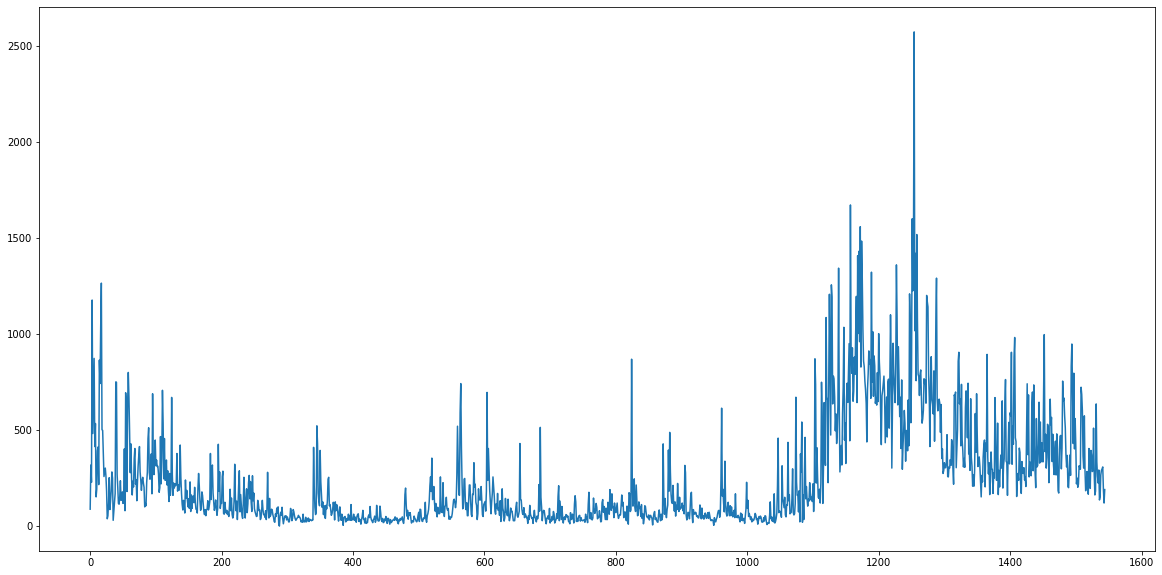

In [54]:
plt.figure(figsize=(15,7))
plt.plot(comments_num)

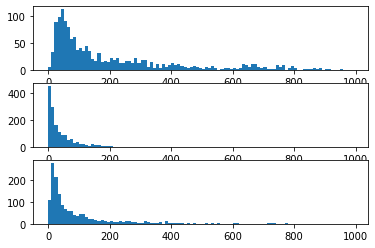

In [41]:
plt.subplot(3, 1, 1)
# fig = plt.figure(figsize = (20,5))
plt.hist(btc_cnt, bins= range(0,1000,10))
plt.subplot(3, 1, 2)
plt.hist(btc_cnt_top, bins= range(0,1000,10))
plt.subplot(3, 1, 3)
plt.hist(btc_cnt_second, bins= range(0,1000,10))
plt.show()

In [45]:
print(df_btc.describe())
print(df_btc.info())

       2018-09-23
count      2606.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2606 entries, 0 to 2293
Columns: 1545 entries, 2017-12-02 to 2022-03-13
dtypes: float64(1), object(1544)
memory usage: 30.7+ MB
None


# sentiment EDA

In [56]:
def sent(x):
    if x > 0:
        return 'positive'
    elif x == 0:
        return 'neutral'
    else:
        return 'negative'

In [57]:
#데이터 클린징
def cleansing(series):
  cleaned = []
  for text in series: #df 데이터 클린징
    if text =='[deleted]' or text == 0: continue #NaN, [deleted]되있는 문장 스킵
    length = len(text.split())#20단어 이상 문장들, 물음표로 끝나는 문장 제거
    if length >20 or text[-1]=='?': continue
    cleaned.append(text)
  return cleaned

In [58]:
#감성점수 비율 계산
def ratio(li):
  neu = 0
  pos = 0
  neg = 0
  for s in li:
    if s == 'neutral':
      neu += 1
    elif s== 'positive':
      pos += 1
    else:
      neg += 1
  total = pos + neu + neg
  if total!=0:
    return [pos/total, neu/total, neg/total]
  else:
    return [0,0,0]

In [59]:
def make_day_score(df):
  day = []
  date = []
  for i in range(1,len(df.columns)):
    cleaned = cleansing(df.iloc[:,i])
    date.append(df.columns[i].replace('-',''))
    sentiments = []
    compounds = []
    for i, text in enumerate(cleaned):# 정제된 데이터에서 긍/중/부 판단
      comp = analyzer.polarity_scores(text)['compound']
      # if abs(comp)<0.1: continue
      sentiments.append(sent(comp))
      # compounds.append(analyzer.polarity_scores(cleaned[i])['compound'])
      compounds.append(comp)
    sent_features = ratio(sentiments)
    sent_features.append(np.mean(compounds))
    sent_features.append(np.var(compounds))
    day.append(sent_features)
  day = pd.DataFrame(day, columns=['pos', 'neu', 'neg', 'mean', 'var'])
  day['day'] = date
  for i in range(len(day)):
    day.loc[i,'day'] = datetime.strptime(day.loc[i,'day'], '20%y%m%d')
  day.set_index('day', inplace =True)
  return day


In [62]:
sent_btc = make_day_score(df_btc)
sent_btc_top = make_day_score(df_btc_top)
sent_btc_second = make_day_score(df_btc_second)

print(sent_btc.describe())
print(sent_btc_top.describe())
print(sent_btc_second.describe())

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


               pos          neu          neg         mean          var
count  1544.000000  1544.000000  1544.000000  1543.000000  1543.000000
mean      0.494705     0.252883     0.251765     0.140661     0.177982
std       0.091667     0.086959     0.081094     0.080198     0.039029
min       0.000000     0.000000     0.000000    -0.301409     0.003415
25%       0.450000     0.202073     0.210452     0.095978     0.157879
50%       0.497308     0.244789     0.254338     0.139801     0.182674
75%       0.542373     0.290323     0.296296     0.183632     0.201077
max       1.000000     0.769231     0.818182     0.591825     0.469331
               pos          neu          neg         mean          var
count  1544.000000  1544.000000  1544.000000  1540.000000  1540.000000
mean      0.538846     0.200926     0.257638     0.177818     0.193479
std       0.167239     0.140615     0.139254     0.149936     0.075103
min       0.000000     0.000000     0.000000    -0.521260     0.000000
25%   

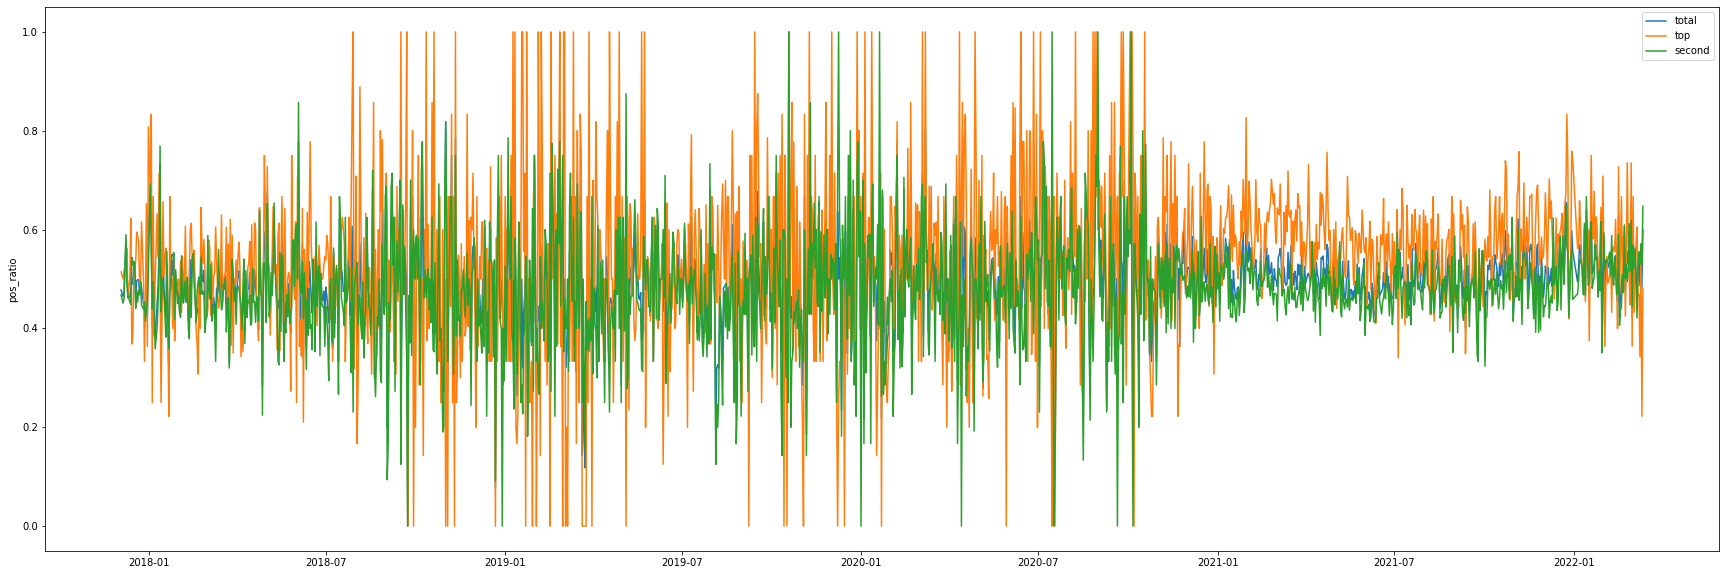

In [68]:
f, ax = plt.subplots(figsize=(30,10))
ax1 = ax.plot(sent_btc.pos, label ='total')
ax2 = ax.plot(sent_btc_top.pos, label = 'top')
ax3 = ax.plot(sent_btc_second.pos, label = 'second')
plt.legend()
plt.ylabel('pos_ratio')
plt.show()

#전체 문장 vader sentiment, compound 저장
#결측치 처리

In [ ]:
for i in range(len(day)):
  if day.index[i]  + timedelta(days=1) != day.index[i+1]: #다음 날짜가 없다
    day.loc[day.index[i]  + timedelta(days=1)] = [day.iloc[i,0],day.iloc[i,1],day.iloc[i,2],day.iloc[i,3],day.iloc[i,4]]
day = day.sort_index()
day

IndexError: ignored

In [ ]:
for i in range(len(day)):
  if day.index[i]  + timedelta(days=1) != day.index[i+1]: #다음 날짜가 없다
    day.loc[day.index[i]  + timedelta(days=1)] = [day.iloc[i,0],day.iloc[i,1],day.iloc[i,2],day.iloc[i,3],day.iloc[i,4]]
day = day.sort_index()
day

In [ ]:
# bitcoin_stats = tfdv.generate_statistics_from_dataframe(day)
# crypto_stats = tfdv.generate_statistics_from_dataframe(df2)

In [ ]:
# tfdv.visualize_statistics(bitcoin_stats)


In [ ]:
# # Compare training with evaluation
# tfdv.visualize_statistics(
#     lhs_statistics=bitcoin_stats, 
#     rhs_statistics=crypto_stats, 
#     lhs_name='bitcoin_sets', 
#     rhs_name='crypto_sets'
# )

In [ ]:
day.to_csv(f'{path_capstone}/feature_v5_filter_low_abs_comp.csv', encoding='utf-8')

In [ ]:
#price에서 day dataframe중 없는 것 제거
price = pd.read_csv(f'{path_capstone}btc_day_price.csv')
price.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
price.set_index('날짜', inplace=True)
price = price.loc['20171202':]
price.index = list(map(str, price.index))
price

open      high       low     close        volume
20171202  10775.04  11190.00  10620.00  10890.01   4765.439757
20171203  10902.69  11825.00  10500.00  11165.41   5346.636524
20171204  11165.41  11600.00  10802.00  11579.00   4663.424562
20171205  11571.03  11853.00  11447.68  11699.99   5550.732055
20171206  11699.99  13615.23  11665.58  13550.05   6707.946319
...            ...       ...       ...       ...           ...
20211031  61859.19  62405.30  59945.36  61299.80  39267.637940
20211101  61299.81  62437.74  59405.00  60911.11  44687.666720
20211102  60911.12  64270.00  60624.68  63219.99  46368.284100
20211103  63220.57  63500.00  60382.76  62896.48  43336.090490
20211104  62896.49  63086.31  61245.57  61893.00  15489.697040

[1434 rows x 5 columns]

In [ ]:
price['fluct'] = (price['close'] - price['close'].shift(1))/price['close'].shift(1)*100
price

open      high       low     close        volume      fluct
20171202  10775.04  11190.00  10620.00  10890.01   4765.439757        NaN
20171203  10902.69  11825.00  10500.00  11165.41   5346.636524   2.528923
20171204  11165.41  11600.00  10802.00  11579.00   4663.424562   3.704208
20171205  11571.03  11853.00  11447.68  11699.99   5550.732055   1.044909
20171206  11699.99  13615.23  11665.58  13550.05   6707.946319  15.812492
...            ...       ...       ...       ...           ...        ...
20211031  61859.19  62405.30  59945.36  61299.80  39267.637940  -0.904296
20211101  61299.81  62437.74  59405.00  60911.11  44687.666720  -0.634080
20211102  60911.12  64270.00  60624.68  63219.99  46368.284100   3.790573
20211103  63220.57  63500.00  60382.76  62896.48  43336.090490  -0.511721
20211104  62896.49  63086.31  61245.57  61893.00  15489.697040  -1.595447

[1434 rows x 6 columns]

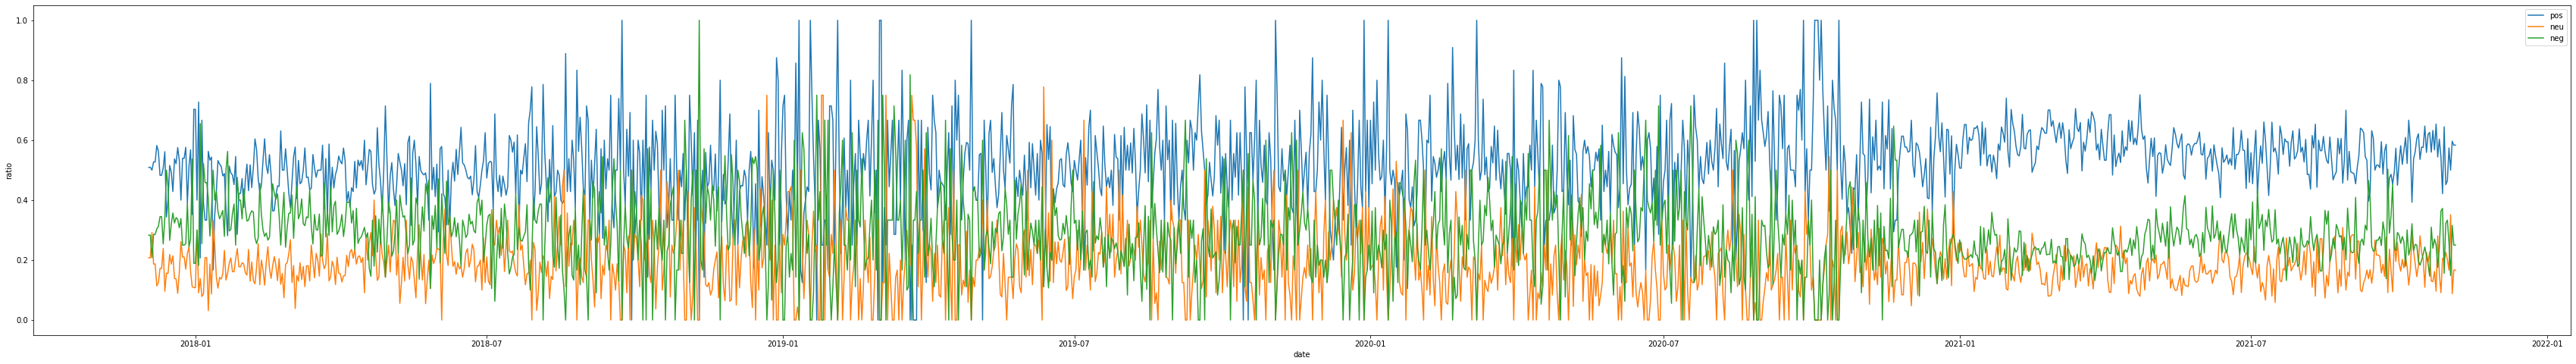

In [ ]:
plt.figure(figsize=(60,8))
plt.plot(day.iloc[:,0], label='pos')
plt.plot(day.iloc[:,1], label='neu')
plt.plot(day.iloc[:,2], label='neg')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()

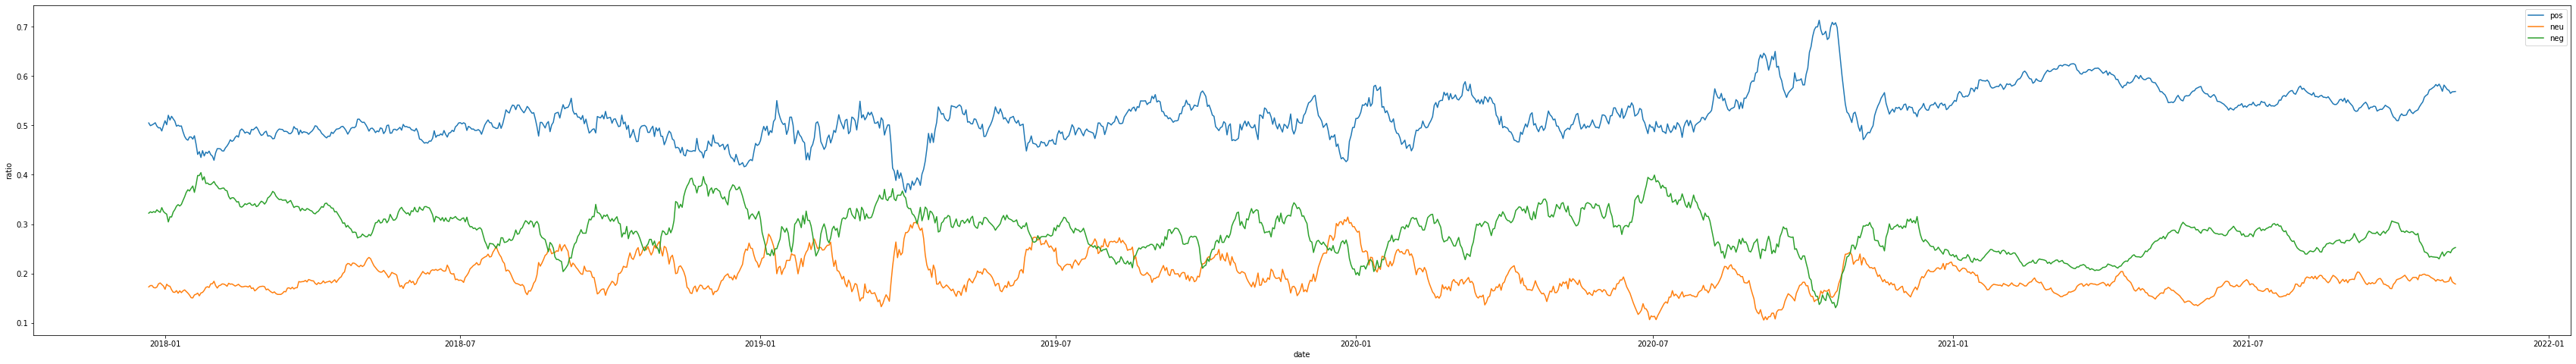

In [ ]:
plt.figure(figsize=(60,8))
plt.plot(day.pos.rolling(window=20, min_periods=20).mean(), label='pos')
plt.plot(day.neu.rolling(window=20, min_periods=20).mean(), label='neu')
plt.plot(day.neg.rolling(window=20, min_periods=20).mean(), label='neg')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/capston/data/day_ratio_updated_MA20.png')

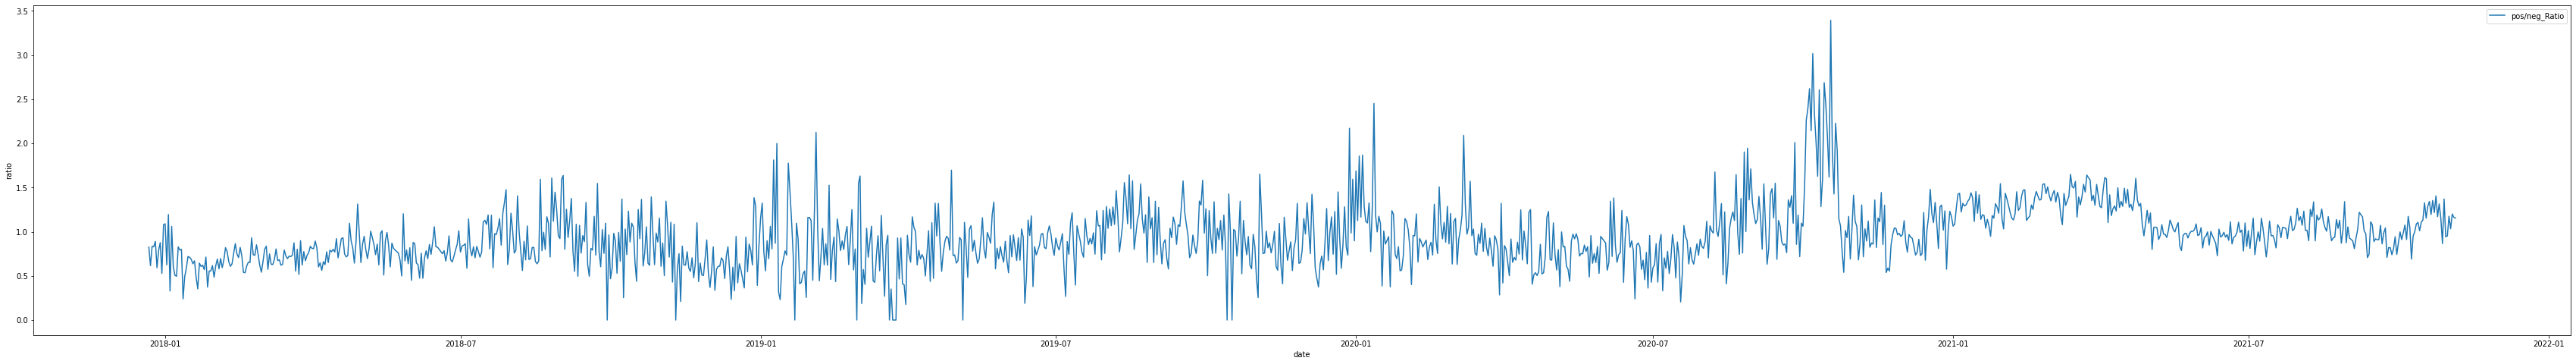

In [ ]:
plt.figure(figsize=(60,8))
plt.plot(day['pos']/(day['neg']*2).rolling(window=20, min_periods=20).mean(), label = 'pos/neg_Ratio')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()

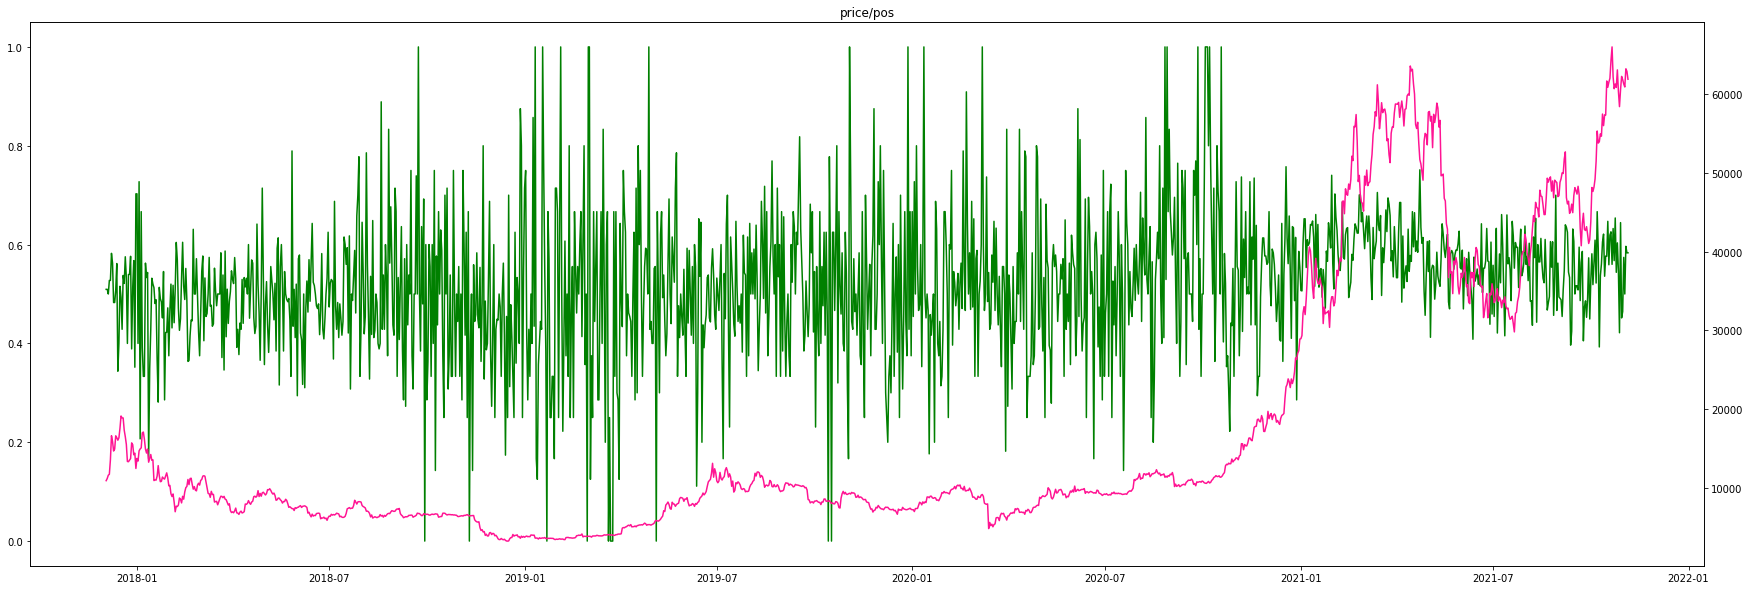

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day['pos']
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos')
plt.show()

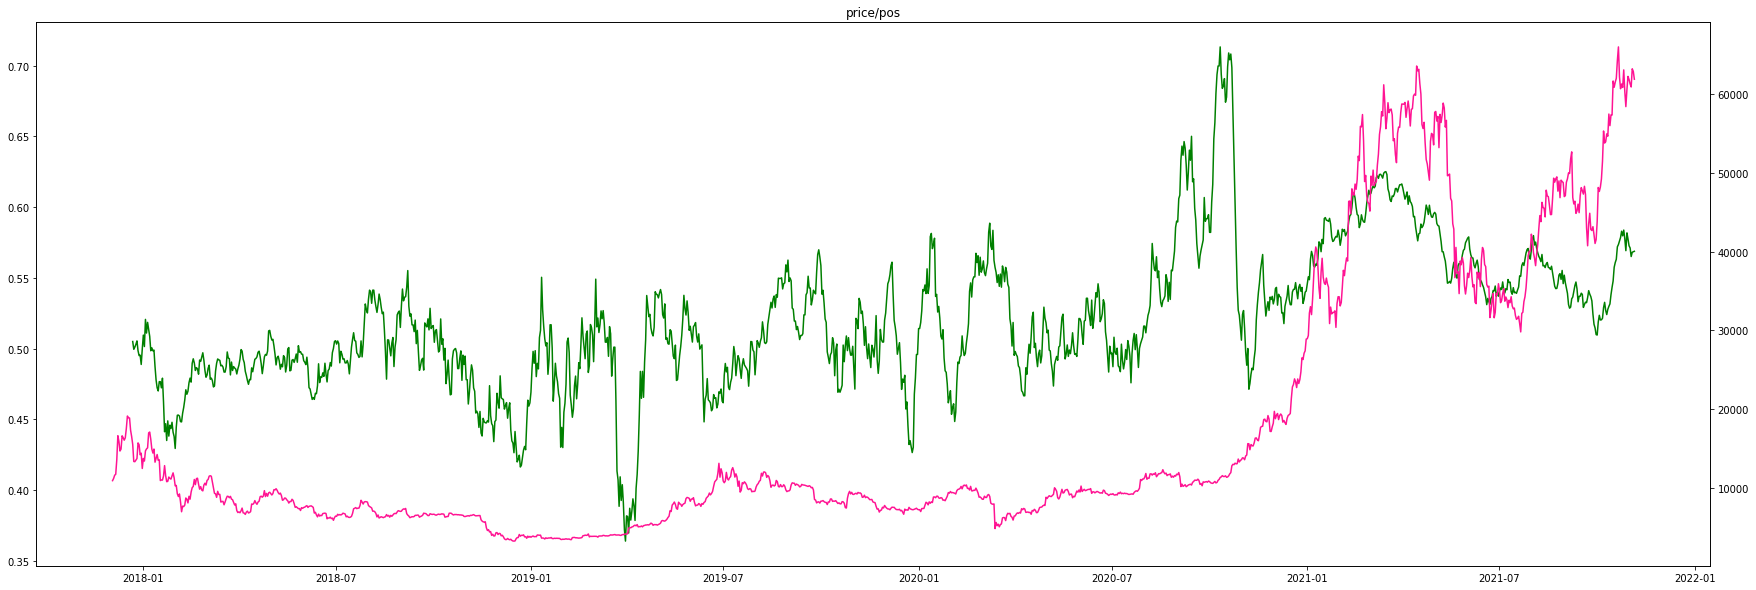

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.pos.rolling(window=20, min_periods=20).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos')
plt.show()

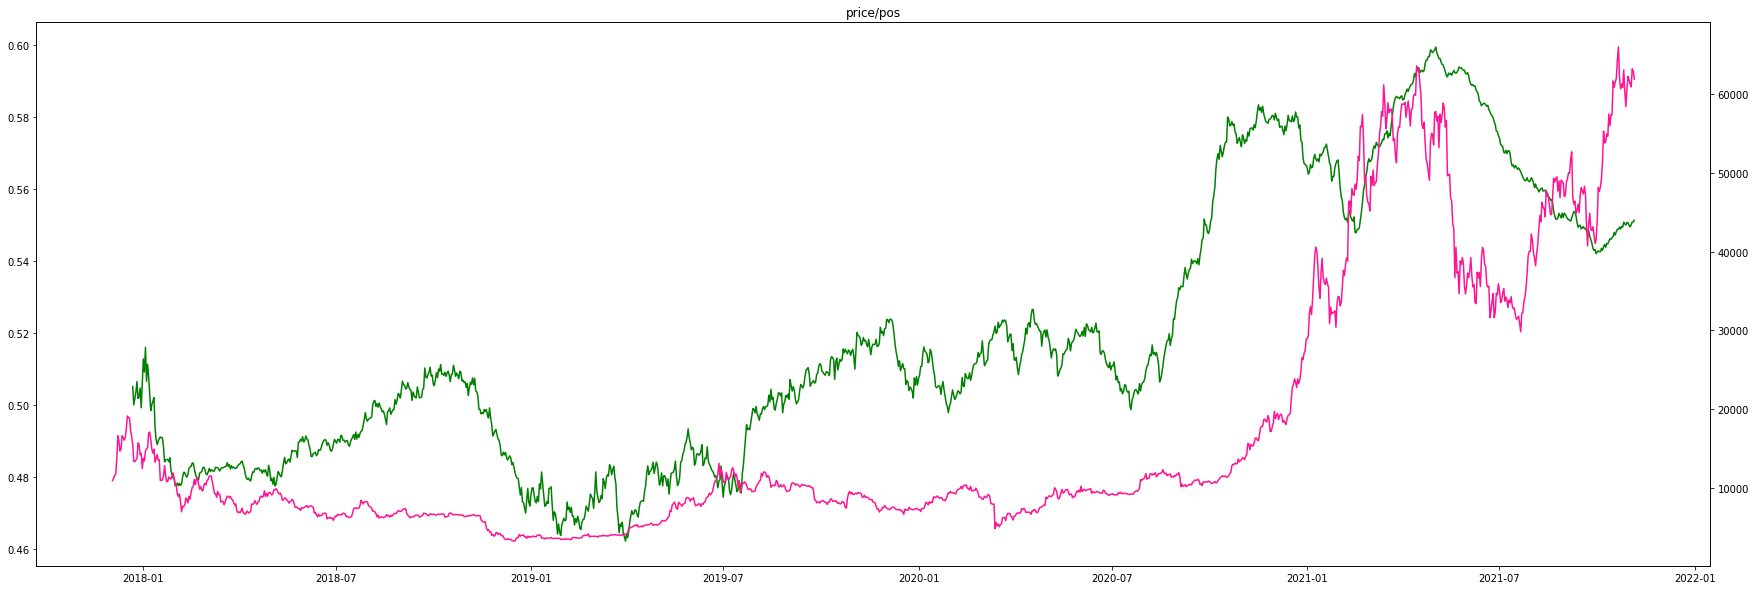

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.pos.rolling(window=120, min_periods=20).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos')
plt.show()

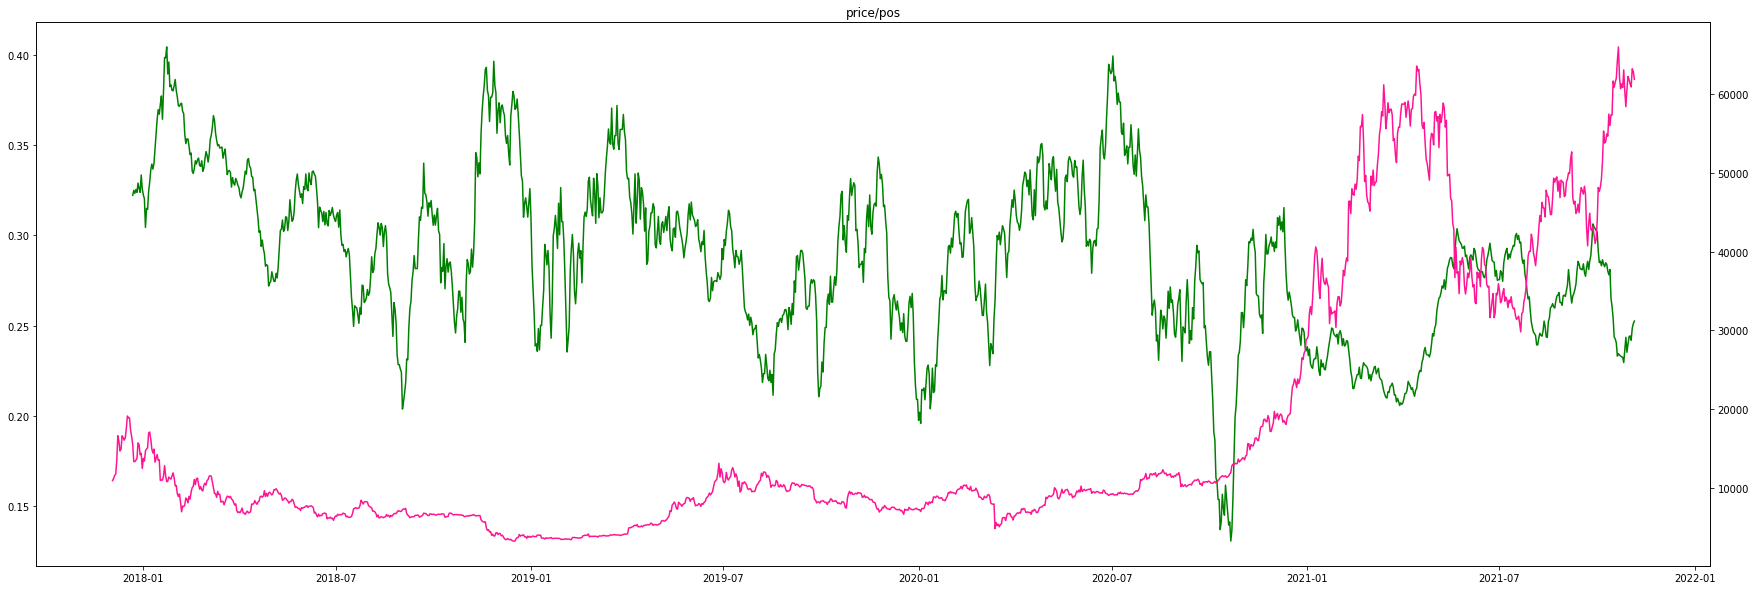

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.neg.rolling(window=20, min_periods=20).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos')
plt.show()

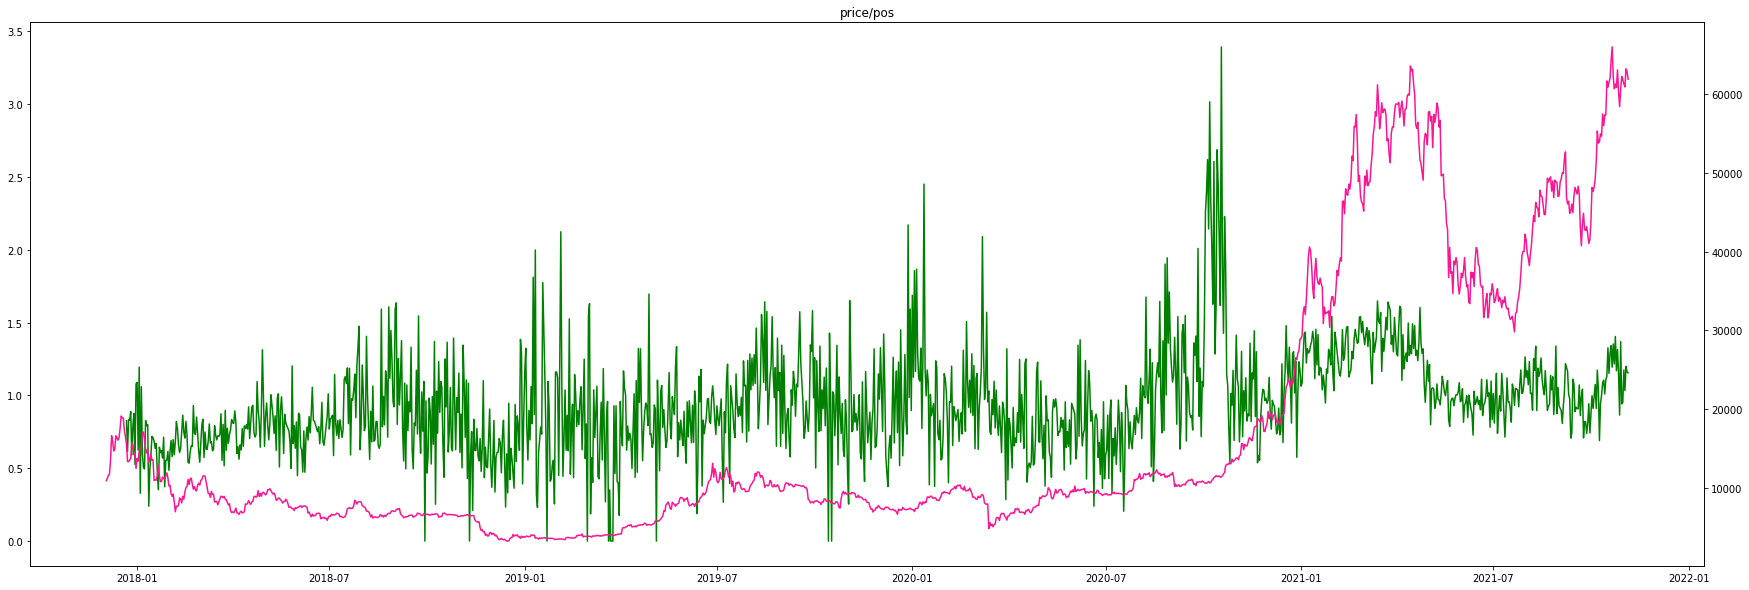

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.pos/(day.neg*2).rolling(window=20, min_periods=20).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/pos')
plt.show()

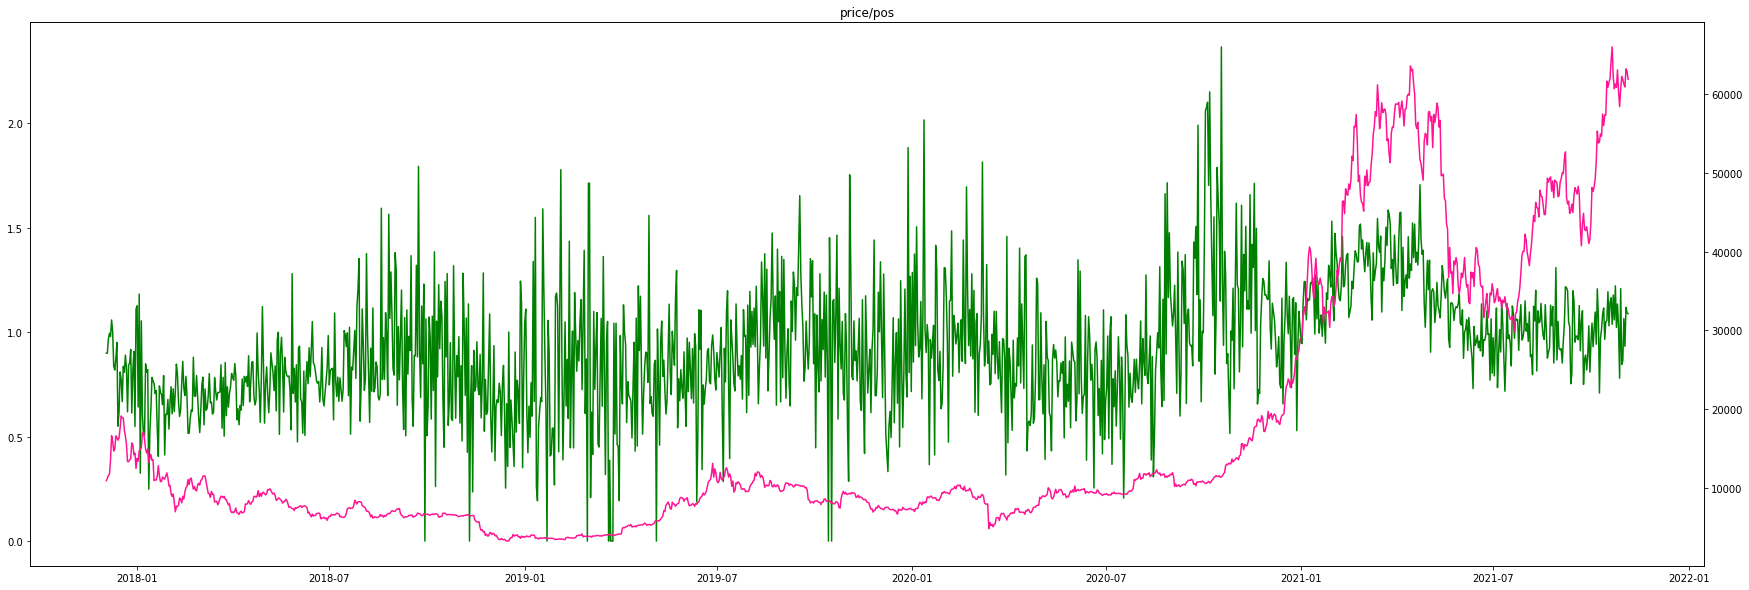

In [ ]:
fig, ax1 = plt.subplots(figsize=(30,10))
x = day.index
y1 = day.pos/(day.neg*2).rolling(window=60, min_periods=1).mean()
y2 = price['close']
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
plt.title('price/neg')
plt.show()

In [ ]:
import numpy as np
#상관계수
print('pos',np.corrcoef(day['pos'], price['close'])[0,1])
print('neg',np.corrcoef(day['neg'], price['close'])[0,1])
print('긍정MA20', np.corrcoef(day.pos.rolling(window=20, min_periods=1).mean(), price['close'])[0,1])
print('부정MA20', np.corrcoef(day.neg.rolling(window=20, min_periods=1).mean(), price['close'])[0,1])
print('긍정/부정MA20',np.corrcoef(day.pos/(day.neg).rolling(window=20, min_periods=1).mean(), price['close'])[0,1])

pos 0.19005440868096263
neg -0.13921459663239302
긍정MA20 0.5682844849333378
부정MA20 -0.4303034999078682
긍정/부정MA20 0.3320163405372801


In [ ]:
day = day[:-2]

In [ ]:
price = price[2:]


In [ ]:
price['close'].shift(1)

20171204         NaN
20171205    11579.00
20171206    11699.99
20171207    13550.05
20171208    16599.00
              ...   
20211031    61859.19
20211101    61299.80
20211102    60911.11
20211103    63219.99
20211104    62896.48
Name: close, Length: 1432, dtype: float64

In [ ]:
print('거래량',np.corrcoef(price['volume'], price['fluct'])[0,1])
print('거래량MA20', np.corrcoef(price.volume.rolling(window=20, min_periods=1).mean(), price['fluct'])[0,1])
print('거래량MA60', np.corrcoef(price.volume.rolling(window=60, min_periods=1).mean(), price['fluct'])[0,1])

거래량 0.00019350454776787955
거래량MA20 0.026903232986771688
거래량MA60 0.03880172485908672


In [ ]:
day['pos-neg'] = (day['pos']-day['neg']*2)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
day

pos       neu       neg      mean       var    pos-neg
day                                                                    
2017-12-03  0.509434  0.207547  0.283019  0.149011  0.211576  -5.660377
2017-12-04  0.509434  0.207547  0.283019  0.149011  0.211576  -5.660377
2017-12-05  0.500000  0.291667  0.208333  0.169177  0.182946   8.333333
2017-12-06  0.527473  0.186813  0.285714  0.143941  0.200533  -4.395604
2017-12-07  0.527473  0.186813  0.285714  0.143941  0.200533  -4.395604
...              ...       ...       ...       ...       ...        ...
2021-10-30  0.451613  0.225806  0.322581  0.070771  0.227779 -19.354839
2021-10-31  0.464286  0.202381  0.333333  0.122206  0.210773 -20.238095
2021-11-01  0.574074  0.166667  0.259259  0.238124  0.218679   5.555556
2021-11-02  0.500000  0.351351  0.148649  0.195634  0.163750  20.270270
2021-11-03  0.596491  0.087719  0.315789  0.186860  0.245813  -3.508772

[1432 rows x 6 columns]

In [ ]:
print('긍정',np.corrcoef(day['pos'], price['fluct'])[0,1])
print('중립',np.corrcoef(day['neu'], price['fluct'])[0,1])
print('부정',np.corrcoef(day['neg'], price['fluct'])[0,1])
print('긍정-부정*2',np.corrcoef(day['pos-neg'], price['fluct'])[0,1])
print('긍정MA5', np.corrcoef(day.pos.rolling(window=5, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA5', np.corrcoef(day.neg.rolling(window=5, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA20', np.corrcoef(day.pos.rolling(window=20, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA20', np.corrcoef(day.neg.rolling(window=20, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA60', np.corrcoef(day.pos.rolling(window=60, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA60', np.corrcoef(day.neg.rolling(window=60, min_periods=1).mean(), price['fluct'])[0,1])
print('긍정MA200', np.corrcoef(day.pos.rolling(window=200, min_periods=1).mean(), price['fluct'])[0,1])
print('부정MA200', np.corrcoef(day.neg.rolling(window=200, min_periods=1).mean(), price['fluct'])[0,1])

긍정 -0.012327952601845112
중립 0.01771697181008595
부정 -0.0017835128562533715
긍정-부정*2 -0.0035734517094258254
긍정MA5 0.02960061716382623
부정MA5 -0.044214006116125096
긍정MA20 0.014110661806779631
부정MA20 -0.04084994767024763
긍정MA60 0.022855958125468274
부정MA60 -0.025806461402768006
긍정MA200 0.03117419475866923
부정MA200 -0.030159614305987313


In [ ]:
price['close']

20171204    11579.00
20171205    11699.99
20171206    13550.05
20171207    16599.00
20171208    15880.00
              ...   
20211031    61299.80
20211101    60911.11
20211102    63219.99
20211103    62896.48
20211104    61893.00
Name: close, Length: 1432, dtype: float64

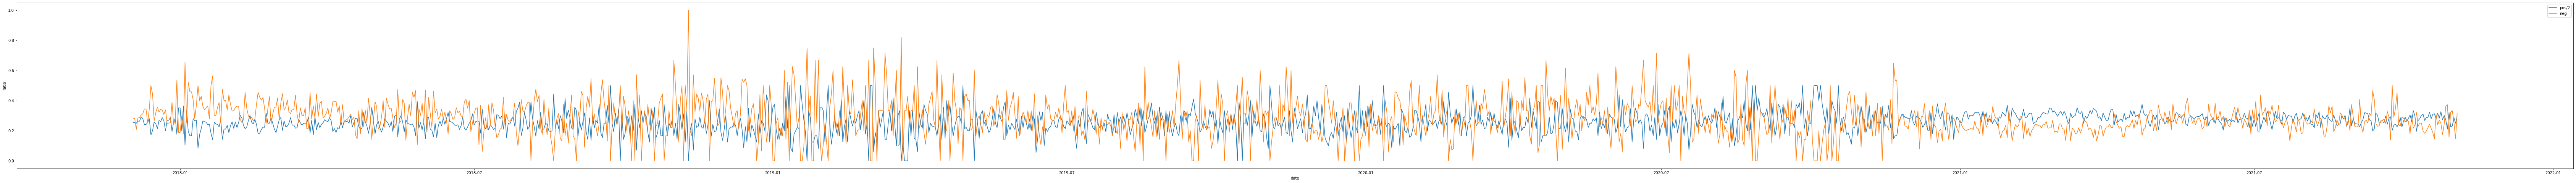

In [ ]:
plt.figure(figsize=(120,8))

plt.plot(day.iloc[:,0]/2, label='pos/2')
# plt.plot(day.iloc[:,1], label='neu')
plt.plot(day.iloc[:,2], label='neg')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()